In [ ]:
# !pip install catboost
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import tqdm
import gc
import math

import pandas as pd
import numpy as np
import pickle
import os
from datetime import datetime, timedelta
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import os
import pandas as pd
import numpy as np


In [ ]:
path_test = 'https://raw.githubusercontent.com/genie-lee-beep/Jieun-Lee/main/AI%20Competition/jobcare%20recommendation/test.csv'

path_train= 'https://raw.githubusercontent.com/genie-lee-beep/Jieun-Lee/main/AI%20Competition/jobcare%20recommendation/train.csv'

path_sub = 'https://raw.githubusercontent.com/genie-lee-beep/Jieun-Lee/main/AI%20Competition/jobcare%20recommendation/sample_submission.csv'

ori_train = pd.read_csv(path_train)
ori_test = pd.read_csv(path_test)
sample_submission = pd.read_csv(path_sub)

train_size = len(ori_train)
test_size = len(ori_test)

display(ori_train,ori_test)


In [ ]:
ori_train.columns

In [5]:
ori_test.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt'],
      dtype='object')

In [ ]:
train = ori_train.drop(['id', 'contents_open_dt'], axis=1) 
test = ori_test.drop(['id', 'contents_open_dt'], axis=1)

In [ ]:
train.columns

In [8]:
train.dtypes

d_l_match_yn               bool
d_m_match_yn               bool
d_s_match_yn               bool
h_l_match_yn               bool
h_m_match_yn               bool
h_s_match_yn               bool
person_attribute_a        int64
person_attribute_a_1      int64
person_attribute_b        int64
person_prefer_c           int64
person_prefer_d_1         int64
person_prefer_d_2         int64
person_prefer_d_3         int64
person_prefer_e           int64
person_prefer_f           int64
person_prefer_g           int64
person_prefer_h_1         int64
person_prefer_h_2         int64
person_prefer_h_3         int64
contents_attribute_i      int64
contents_attribute_a      int64
contents_attribute_j_1    int64
contents_attribute_j      int64
contents_attribute_c      int64
contents_attribute_k      int64
contents_attribute_l      int64
contents_attribute_d      int64
contents_attribute_m      int64
contents_attribute_e      int64
contents_attribute_h      int64
person_rn                 int64
contents

<AxesSubplot:>

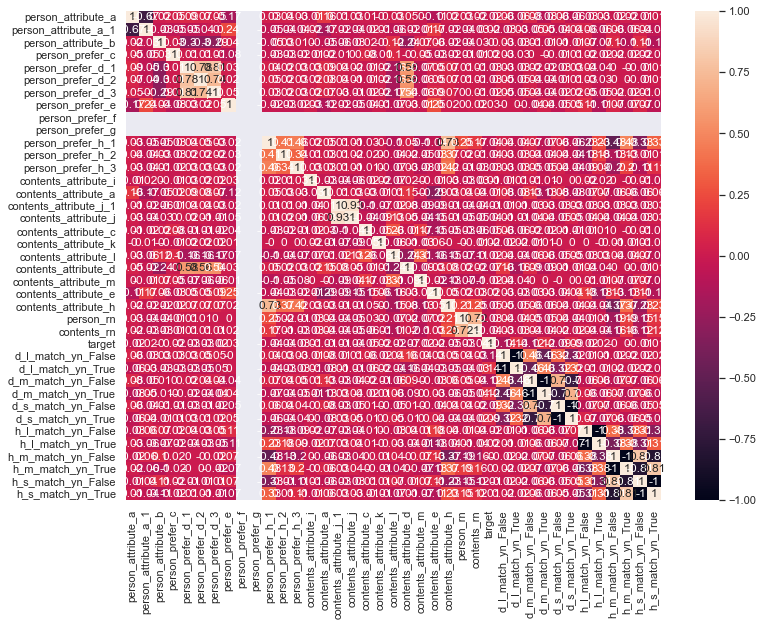

In [18]:
# numeric feature correaltion check
import seaborn as sns 

correlation_matrix = train.corr().round(2)

sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(data=correlation_matrix, annot=True) # 상관계수 분석

In [9]:
oh_train = pd.get_dummies(train, columns = [ 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn'])
oh_train

,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,...,d_m_match_yn_False,d_m_match_yn_True,d_s_match_yn_False,d_s_match_yn_True,h_l_match_yn_False,h_l_match_yn_True,h_m_match_yn_False,h_m_match_yn_True,h_s_match_yn_False,h_s_match_yn_True
0,1,4,3,5,275,370,369,8,1,1,...,0,1,0,1,1,0,1,0,1,0
1,1,3,4,1,114,181,175,4,1,1,...,1,0,1,0,0,1,0,1,1,0
2,2,0,3,5,464,175,452,3,1,1,...,1,0,1,0,0,1,1,0,1,0
3,2,0,2,5,703,705,704,3,1,1,...,1,0,1,0,0,1,1,0,1,0
4,1,3,4,5,275,370,369,4,1,1,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,1,1,2,2,1192,935,1228,3,1,1,...,1,0,1,0,0,1,1,0,1,0
501947,1,6,2,1,118,113,110,4,1,1,...,0,1,1,0,0,1,1,0,1,0
501948,1,7,4,1,147,46,145,4,1,1,...,0,1,0,1,0,1,1,0,1,0
501949,1,1,2,1,46,147,145,4,1,1,...,1,0,1,0,0,1,1,0,1,0


In [10]:
oh_train.shape

(501951, 39)

In [11]:
oh_train.columns

Index(['person_attribute_a', 'person_attribute_a_1', 'person_attribute_b',
       'person_prefer_c', 'person_prefer_d_1', 'person_prefer_d_2',
       'person_prefer_d_3', 'person_prefer_e', 'person_prefer_f',
       'person_prefer_g', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'target',
       'd_l_match_yn_False', 'd_l_match_yn_True', 'd_m_match_yn_False',
       'd_m_match_yn_True', 'd_s_match_yn_False', 'd_s_match_yn_True',
       'h_l_match_yn_False', 'h_l_match_yn_True', 'h_m_match_yn_False',
       'h_m_match_yn_True', 'h_s_match_yn_False', 'h_s_match_yn_True'],
      dtype='object')

In [12]:
# 1인1 person_rn가 아님 
oh_train['person_rn'].nunique() 

300177

In [13]:
# 중복값 없음 
# Before
oh_train[oh_train.duplicated(keep=False)]

print("Before:", len(oh_train))

# After
oh_train = oh_train.drop_duplicates()

print("After:", len(oh_train))

Before: 501951
After: 501951


array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

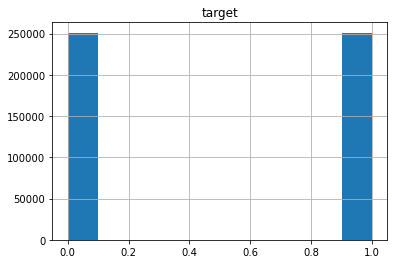

In [16]:
# target data의 imbalance를 확인
oh_train.hist('target')

# Scaling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

In [ ]:
oh_train.describe()

http://pyengine.blogspot.com/2013/07/numpy-array_29.html
0723_#임대보증금#임대료 결측치 채우기 모델_Feature Scaling_Cross Validation_Model

In [ ]:
oh_train.dtypes

In [ ]:

y = train['target']
X = train.columns 


# 피처스케일링
scaler = StandardScaler()
X_nor = scaler.fit_transform(X)



# scaler = StandardScaler()   
# scaler = scaler.fit_transform(X_train)

# # 교차검증시
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:

# deeplearning
import tensorflow as tf
from tensorflow.keras import layers  
# from sklearn import tree
# from sklearn.tree import export_graphviz

# machine learning
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier #현재 머신러닝 알고리즘의 왕으로 불리우며, 일반적으로 가장 높은 성능을 자랑한다고 알려져있습니다.(xgboost는 sklearn에 포함되어있지 않아서 별도 설치하셔야합니다!)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

# svm
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score 
from catboost import Pool,CatBoostClassifier


In [ ]:

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Input, Dense, Activation, Reshape, Concatenate
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt
from keras.models import Model as KerasModel
import bisect